### New York City Airbnb Data 2019

#### Context
Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present more unique, personalized way of experiencing the world. This dataset describes the listing activity and metrics in NYC, NY for 2019.

#### Content
This data file includes all needed information to find out more about hosts, geographical availability, necessary metrics to make predictions and draw conclusions.

#### Acknowledgements
This public dataset obtained from Kaggle is part of Airbnb, and the original source can be found on Airbnb website. 

#### Data Exploration

There are many interesting takeaways from this Airbnb data. For the purpose of this analysis, the following questions are picked to be explored further.

- What can we learn about listings in different neighborhood groups in NYC? (The 5 Boroughs) 
- What can we learn about the neighborhood within the neighborhood groups in NYC?
- What can we learn from the deciding factors (features) that correlate to the price of the listings?

The reason why we chose these questions are to determine the distribution of Airbnb properties located in New York City. It helps both potential customers and property owners in determining their best interests. For example, a potential customer might want to know if staying in Manhattan would generally be more expensive than staying in Queens. 

A property owner who would be interested in putting up his/her listing on the Airbnb website might also want to know if having a private room or shared room would benefit them more. Through analyzing these 3 questions, hopefully we can gain a little bit more understanding about the data. 

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style = 'white')

Read the data set of NYC Airbnb using pandas.read_csv. Once the data is loaded, study each of the columns and what they contribute to the data. The following list provides the description of each column:

1. id - the listing ID
2. name - the name of the listing on Airbnb website
3. host_id - the ID of the host
4. host_name - the name of the host
5. neighbourhood_group - the 5 boroughs of New York City
6. neighbourhood - the area within each boroughs of New York City
7. latitude - latitude coordinates
8. longitude - longitude coordinates
9. room_type - listing space type
10. price - listing's price
11. number_of_reviews - the total number of reviews the listing has recieved
12. last_review - the date of the last review received
13. reviews_per_month - the number of reviews received by the listing per month
14. calculated_host_listings_count - amount of listings per host
15. availability_365 - number of days when listing is available for booking

Some of these columns are analyzed further depending on the data available for our purpose. Keeping in mind that we have an end goal of predicting prices of Airbnb in NYC, it is essential to look through the data set and identify any missing values. It is also helpful to spot and recognize any features that might not be useful for our model in the future. 

In [2]:
nyc = pd.read_csv('airbnb_nyc.csv')
nyc.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
nyc.isnull().sum().sort_values(ascending = False)

reviews_per_month                 10052
last_review                       10052
host_name                            21
name                                 16
availability_365                      0
calculated_host_listings_count        0
number_of_reviews                     0
minimum_nights                        0
price                                 0
room_type                             0
longitude                             0
latitude                              0
neighbourhood                         0
neighbourhood_group                   0
host_id                               0
id                                    0
dtype: int64

Based on the data above, it seems that we need to decide what to do with the missing values. 

It is interesting to see from the above information that there are 4 features that contain missing values. Both name and host_name information are irrelevant for our purpose and therefore should be dropped. It is also noted that the last_review feature contains missing values due to the unavailability of reviews for those particular listings. Therefore we can also drop this feature. 

The availability_365 feature contains some values which are 0. This potentially means that the Airbnb is currently unavailable (but might resurface in the future). For the purpose of this analysis, all of Airbnb which are currently not available for customers will be dropped.

As for the reviews_per_month, it is safe to fill the missing values with 0 since this information is also unavailable since the listings have not received any review just yet.

In [4]:
nyc = nyc.drop(['name', 'host_name', 'last_review'], axis = 1)
nyc['reviews_per_month'] = nyc['reviews_per_month'].fillna(0)

In [5]:
nyc['availability_365'] = nyc['availability_365'].mask(nyc['availability_365'] == 0)

In [6]:
nyc = nyc.dropna(axis = 0, subset = ['availability_365'])

In [7]:
nyc.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365.0
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355.0
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365.0
3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194.0
5,5099,7322,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,0.59,1,129.0


In [8]:
nyc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31362 entries, 0 to 48894
Data columns (total 13 columns):
id                                31362 non-null int64
host_id                           31362 non-null int64
neighbourhood_group               31362 non-null object
neighbourhood                     31362 non-null object
latitude                          31362 non-null float64
longitude                         31362 non-null float64
room_type                         31362 non-null object
price                             31362 non-null int64
minimum_nights                    31362 non-null int64
number_of_reviews                 31362 non-null int64
reviews_per_month                 31362 non-null float64
calculated_host_listings_count    31362 non-null int64
availability_365                  31362 non-null float64
dtypes: float64(4), int64(6), object(3)
memory usage: 3.3+ MB


At this point, the data has been successfully updated so that there are no longer missing values within the features. The total number of data also reduces significantly due to the availability_365 feature (now only nonzero values). 

Now that the data is clean, we can start exploring the first two questions we posed in the beginning of this analysis. 

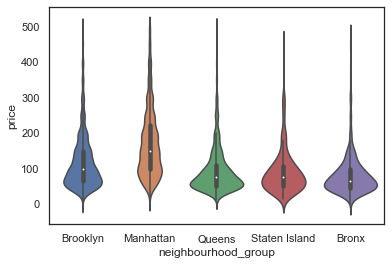

In [9]:
sns.violinplot(x = 'neighbourhood_group', y = 'price', data = nyc[nyc['price'] < 500]);

The price less than \\$500 is plotted above to remove some extreme values (data outliers).

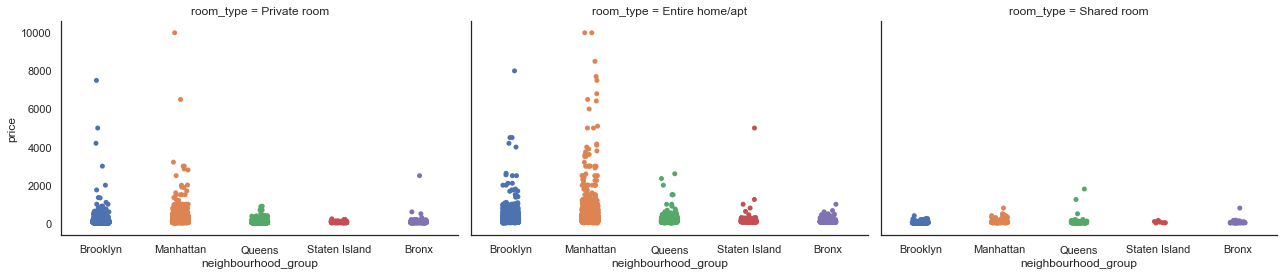

In [10]:
g = sns.catplot(x = 'neighbourhood_group', y = 'price', col = 'room_type', data = nyc, height = 4, aspect = 1.5);

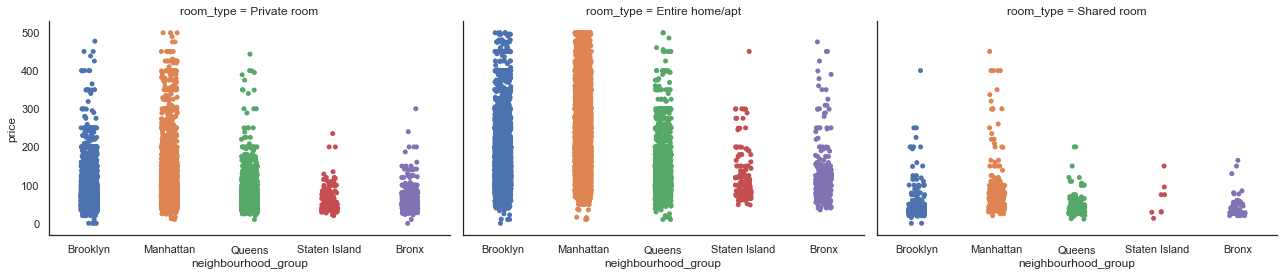

In [11]:
g = sns.catplot(x = 'neighbourhood_group', y = 'price', col = 'room_type', data = nyc[nyc['price'] < 500], height = 4, aspect = 1.5);
g.savefig('figures/neighbourhood_group_dist.png', dpi = 300)

The categorical plot above shows that alhtough most of the properties' cost are lower than \\$2000, some high end property is also available in the area, especially in Manhattan with some in Brooklyn. 

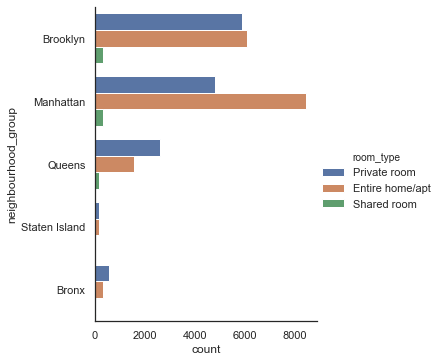

In [12]:
g = sns.catplot(y = 'neighbourhood_group', hue = 'room_type', kind = 'count', data = nyc);
g.savefig('figures/neighbourhood_group_count.png', dpi = 300)

The count plot above provides the information of which neighborhood group has the most properties. Through filtering the room type, we can also observe how the entire home or apartment seems to be superior in numbers. Although private room's number is also up there, the shared room seems to be a small portion of the overall listings available in NYC.

In [13]:
filtered_airbnb = nyc[(nyc['number_of_reviews'] >= 50) & (nyc['availability_365'] == 365)]

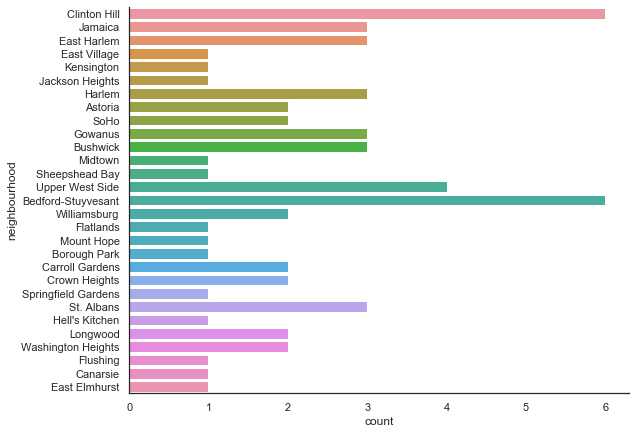

In [14]:
g = sns.catplot(y = 'neighbourhood', kind = 'count', palette = None, height = 6, aspect = 1.5, data = filtered_airbnb);
g.savefig('figures/neighbourhood_count.png', dpi = 300)

If we want to take a look at the popular Airbnb locations in NYC, we can filter the data by looking at listings with 50 or more number of reviews. For the purpose of this analysis, we will narrow down the Airbnb locations to those available for the entire year. 

We can see that there are 6 properties available in Clinton Hill and Bedford-Stuyvesant area. Therefore if you are a potential tourist coming to NYC, these two areas might be great starting locations to start looking for your Airbnb!

In [15]:
nyc.describe().T

,count,mean,std,min,25%,50%,75%,max
id,31362.0,2.100481e+07,1.148631e+07,2539.00000,1.167514e+07,2.254548e+07,3.119407e+07,3.648724e+07
host_id,31362.0,8.144950e+07,8.673088e+07,2571.00000,8.620116e+06,4.109561e+07,1.452145e+08,2.743213e+08
latitude,31362.0,4.072840e+01,5.656108e-02,40.49979,4.068838e+01,4.072372e+01,4.076303e+01,4.091306e+01
longitude,31362.0,-7.394874e+01,5.139668e-02,-74.24442,-7.398327e+01,-7.395411e+01,-7.393013e+01,-7.371299e+01
price,31362.0,1.620505e+02,2.544255e+02,0.00000,7.000000e+01,1.115000e+02,1.890000e+02,1.000000e+04
minimum_nights,31362.0,8.338658e+00,2.383670e+01,1.00000,2.000000e+00,3.000000e+00,5.000000e+00,1.250000e+03
number_of_reviews,31362.0,3.185237e+01,5.163680e+01,0.00000,2.000000e+00,1.000000e+01,3.900000e+01,6.290000e+02
reviews_per_month,31362.0,1.509593e+00,1.781266e+00,0.00000,1.700000e-01,9.200000e-01,2.340000e+00,5.850000e+01
calculated_host_listings_count,31362.0,1.033407e+01,4.070040e+01,1.00000,1.000000e+00,1.000000e+00,3.000000e+00,3.270000e+02
availability_365,31362.0,1.758320e+02,1.261876e+02,1.00000,5.500000e+01,1.680000e+02,3.050000e+02,3.650000e+02


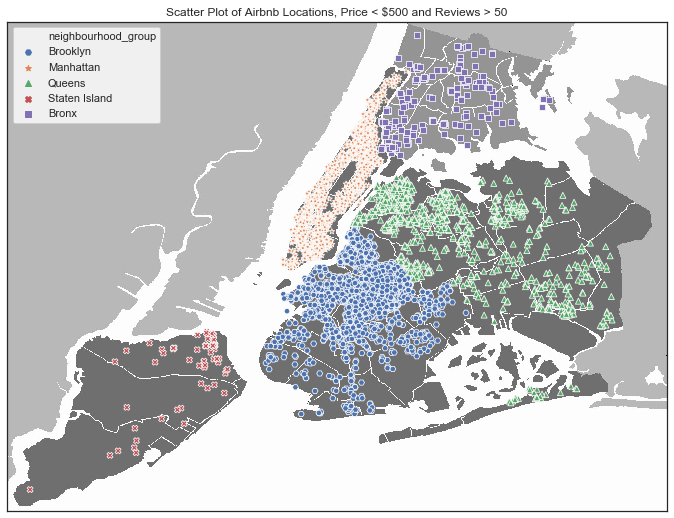

In [16]:
under_500 = nyc[(nyc['price'] <= 500) & (nyc['number_of_reviews'] >= 50)]

fig = plt.figure(figsize=(16,9))

nyc_img = plt.imread('figures/nyc_map.png', 0)
plt.imshow(nyc_img, extent = [-74.26, -73.68, 40.49, 40.92])

markers = {'Manhattan': '*', 'Brooklyn': 'H', 'Bronx': 's', 'Staten Island': 'X', 'Queens': '^'}
sns.scatterplot(x = 'longitude', y = 'latitude', data = under_500, hue = 'neighbourhood_group', 
                style = 'neighbourhood_group', markers = markers)

plt.xlabel('')
plt.xticks([])
plt.ylabel('')
plt.yticks([])
plt.title('Scatter Plot of Airbnb Locations, Price < $500 and Reviews > 50')
plt.show()

fig.savefig('figures/airbnb_locs.png', dpi = 600)

The plot above is shown for a visualization of Airbnb listings' distribution based on medium end property and ones that have received a review higher than 50.

In [17]:
nyc.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365.0
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355.0
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365.0
3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194.0
5,5099,7322,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,0.59,1,129.0


#### Feature Selection for Price Correlation

In order to see which features that correlate (contribute) to the increase or decrease of listings price, the following methods are applied to the dataset.

- get_dummies for minimum_nights, neighbourhood_group, room_type, calculated_host_listings_count, availability_365 (for calculated_host_listings_count, create cut points)
- normalize for number_of_reviews, and reviews_per_month
- drop id, host_id, neighbourhood (too many variabilities) and latitude, longitude

Using dummies can be effective for categorical data, especially in breaking up data with outliers. For example, if two listings are considered high end with huge price difference, we can still categorize it as a high end listing by transforming continuous data to categorical data. Once the categorical data is processed, pd.get_dummies can be used to provide a numerical representation of these data.

Some data need to be normalized so that a machine learning model can perform better (although no machine learning model is being applied here, an assumption of using linear regression is made).

Drop the rest of the columns which are unusable for the model (in certain cases it might be better to create a copy of the dataframe, instead of making changes on the original one).

In [18]:
def cat_variables(df, col, cut_points, label_names):
    series = pd.cut(df[col], cut_points, labels = label_names)
    df[col] = series
    return df

In [19]:
label_nights = ['short_term', 'medium_term', 'long_term']
cut_nights = [0, 30, 120, 400]

nyc = cat_variables(nyc, 'minimum_nights', cut_nights, label_nights)


label_listings_count = ['low', 'medium', 'high', 'very_high']
cut_listings_count = [0, 10, 50, 100, 500]

nyc = cat_variables(nyc, 'calculated_host_listings_count', cut_listings_count, label_listings_count)

label_avail = ['rare', 'seasonal', 'often']
cut_avail = [0, 120, 240, 400]

nyc = cat_variables(nyc, 'availability_365', cut_avail, label_avail)

In [20]:
nyc.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,short_term,9,0.21,low,often
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,short_term,45,0.38,low,often
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,short_term,0,0.00,low,often
3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,short_term,270,4.64,low,seasonal
5,5099,7322,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,short_term,74,0.59,low,seasonal


In [21]:
def cat_dummies(df, column):
    dummies = pd.get_dummies(df[column], prefix = column)
    df = pd.concat([df, dummies], axis = 1)
    df = df.drop(column, axis = 1)
    return df

In [22]:
column_dummies = ['minimum_nights', 'neighbourhood_group', 'room_type', 'calculated_host_listings_count', 'availability_365']

for col in column_dummies:
    nyc = cat_dummies(nyc, col)

In [23]:
from sklearn.preprocessing import minmax_scale

columns_normalize = ['number_of_reviews', 'reviews_per_month']

for col in columns_normalize:
    nyc[col] = minmax_scale(nyc[col])

In [24]:
nyc = nyc.drop(['id', 'host_id', 'neighbourhood', 'latitude', 'longitude'], axis = 1)

In [25]:
name = ['Price', 'Reviews', 'Reviews/Month', 'Short Term Stay', 'Medium Term Stay', 'Long Term Stay',
        'Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Entire Home/Apt', 'Private', 'Shared',
        'Low Num Listings', 'Medium Num Listings', 'High Num Listings', 'Very High Num Listings', 'Open Rare', 'Open Seasonal', 'Always Open']

nyc.columns = name

In [26]:
pd.Series(nyc.describe().T.index)

0                      Price
1                    Reviews
2              Reviews/Month
3            Short Term Stay
4           Medium Term Stay
5             Long Term Stay
6                      Bronx
7                   Brooklyn
8                  Manhattan
9                     Queens
10             Staten Island
11           Entire Home/Apt
12                   Private
13                    Shared
14          Low Num Listings
15       Medium Num Listings
16         High Num Listings
17    Very High Num Listings
18                 Open Rare
19             Open Seasonal
20               Always Open
dtype: object

Let's build a heatmap representation of the dataframe. The values within the heatmap will represent the correlation for the price variable (target variable of our data exploration). A negative value specifies negative contribution to the price, while a positive value specifies a positive contribution.

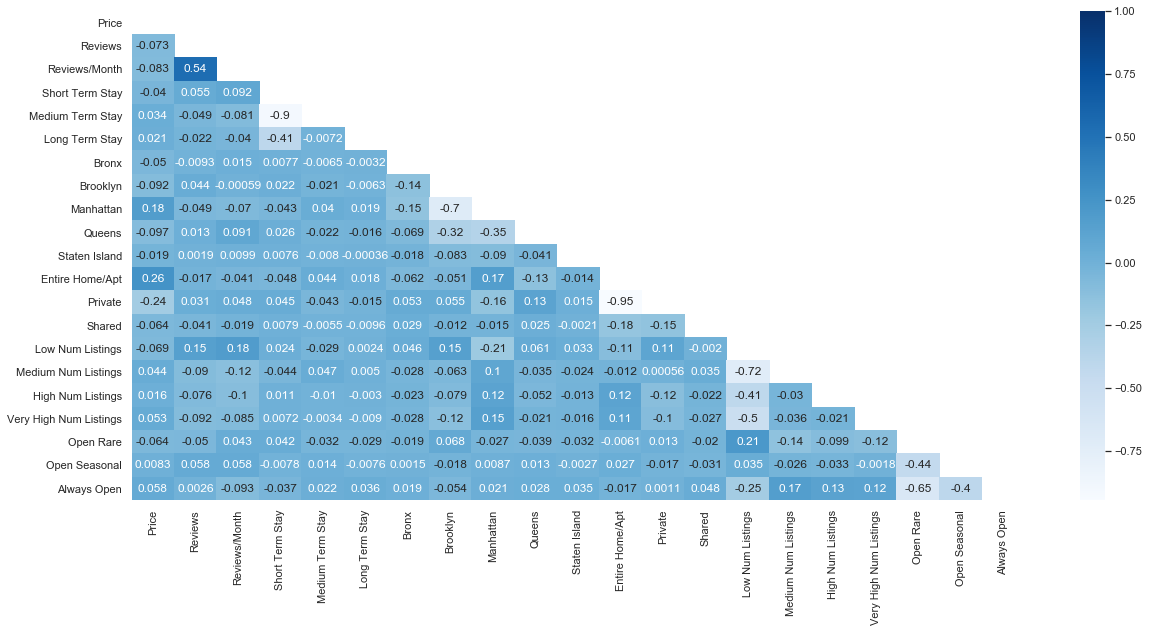

In [27]:
heatmap_vars = nyc

corr = heatmap_vars.corr()
mask = np.triu(corr)
cmap = 'Blues'

with sns.axes_style('white'):
    f, ax = plt.subplots(figsize = (20, 9))
    ax = sns.heatmap(corr, mask = mask, cmap = cmap, annot = True)

figure = ax.get_figure()    
figure.savefig('figures/heatmap_features.png', dpi = 300)

#### Significant Features in Predicting Price

Based on the heatmap, we can conclude some of the variables to be worth taken into account.

Positive correlation (values with 0.1 or above):
1. neighbourhood_group_Manhattan
2. room_type_Entire home/apt

Negative correlation (values with -0.1 or below):
1. room_type_Private room

Obviously, these are not very good indicators for our price prediction due to most of the features being very small in correlation. There are many ways to improve the correlations by:

1. Filtering/removing extreme values (outliers) from the data set, e.g. very high-end listings, some listings that require long term staying, etc.
2. Feature selection and engineering:
    - Creating new features that might be more relevant in terms of providing an insight for predicting price
    - Obtaining other features such as the review texts: since the reviews might be negative/positive depending on the customer rather than relying entirely on number of reviews